### **CC57 - MACHINE LEARNING - PREPROCESAMIENTO DE DATOS**

#### **Información del Conjunto de Datos**

**Origen:** https://data.world/uci/liver-disorders

**Descripción:** BUPA Medical Research Ltd. database donated by Richard S. Forsyth

Las primeras 5 variables son todos análisis de sangre que se cree que son sensibles a los trastornos hepáticos que pueden surgir por el consumo excesivo de alcohol. Cada línea del archivo bupa.data constituye el registro de un único individuo masculino.
Parece que bebidas>5 es una especie de selector en esta base de datos.

El conjunto de datos contiene 345 observaciones en 7 caracteristicas.

**Caracteristicas:**

1. mcv mean corpuscular volume (V1 volumen corpuscular medio)
2. alkphos alkaline phosphotase (V2 fosfotasa alcalina)
3. sgpt alamine aminotransferase (V3 alamina aminotransferasa)
4. sgot aspartate aminotransferase (V4 aspartato aminotransferasa)
5. gammagt gamma-glutamyl transpeptidase (V5 gamma-glutamil transpeptidasa)
6. drinks number of half-pint equivalents of alcoholic beverages drunk per day (V6 número de bebidas media de bebidas alcohólicas consumidas por día)
7. selector field used to split data into two sets (V7 campo selector utilizado para dividir datos en dos conjuntos)

####  **Identificación y tratamiento de outliers**

In [41]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats

In [42]:
data = pd.read_csv('bupa.csv',sep=";")

In [43]:
data.shape

(345, 7)

In [44]:
data.head()

,V1,V2,V3,V4,V5,V6,V7
0,85,92,45,27,31,0.0,1
1,85,64,59,32,23,0.0,2
2,86,54,33,16,54,0.0,2
3,91,78,34,24,36,0.0,2
4,87,70,12,28,10,0.0,2


In [45]:
data.dtypes

V1      int64
V2      int64
V3      int64
V4      int64
V5      int64
V6    float64
V7      int64
dtype: object

In [46]:
#Cambiamos a tipo object a V7
data['V7'] = data.V7.astype(object)

In [47]:
data.dtypes

V1      int64
V2      int64
V3      int64
V4      int64
V5      int64
V6    float64
V7     object
dtype: object

In [48]:
data_X = pd.DataFrame(data.drop('V7', axis=1))
data_X.head()

,V1,V2,V3,V4,V5,V6
0,85,92,45,27,31,0.0
1,85,64,59,32,23,0.0
2,86,54,33,16,54,0.0
3,91,78,34,24,36,0.0
4,87,70,12,28,10,0.0


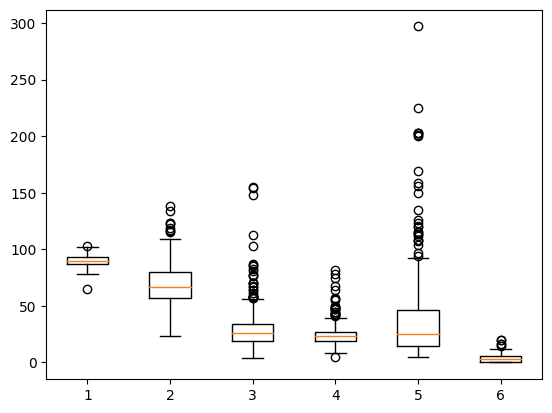

In [49]:
#1.Boxplot
plt.boxplot(data_X)
plt.show()

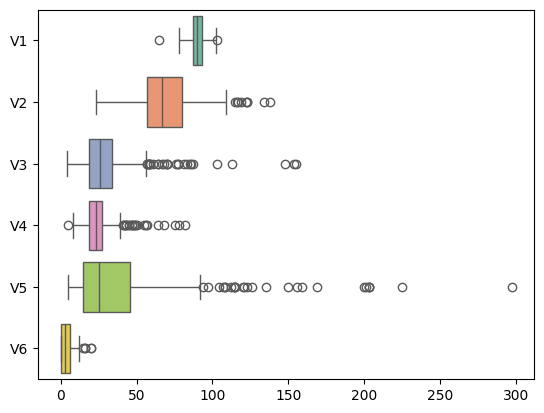

In [50]:
sns.boxplot(data=data_X, orient="h", palette="Set2")
plt.show()

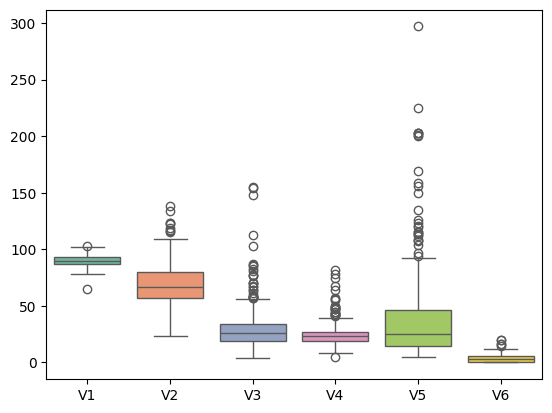

In [51]:
sns.boxplot(data=data_X, orient="v", palette="Set2")
plt.show()

In [52]:
#1.Tratamiento 1
#Las variables se aproximan a una distribución normal

In [53]:
data_X = pd.DataFrame(data.drop('V7', axis=1))
data_X.head()

,V1,V2,V3,V4,V5,V6
0,85,92,45,27,31,0.0
1,85,64,59,32,23,0.0
2,86,54,33,16,54,0.0
3,91,78,34,24,36,0.0
4,87,70,12,28,10,0.0


In [54]:
#Prueba de normalidad
stats.shapiro(data_X.V1)

ShapiroResult(statistic=0.9721211791038513, pvalue=3.340998546264018e-06)

In [55]:
stats.shapiro(data_X.V2)

ShapiroResult(statistic=0.9662437438964844, pvalue=3.605003939810558e-07)

In [56]:
stats.shapiro(data_X.V3)

ShapiroResult(statistic=0.7289112210273743, pvalue=2.580097543764146e-23)

In [57]:
stats.shapiro(data_X.V4)

ShapiroResult(statistic=0.8149621486663818, pvalue=1.402879061091299e-19)

In [58]:
stats.shapiro(data_X.V5)

ShapiroResult(statistic=0.6839386224746704, pvalue=6.481027775730031e-25)

In [59]:
stats.shapiro(data_X.V6)

ShapiroResult(statistic=0.8354933261871338, pvalue=1.686413543264296e-18)

In [60]:
#Con un nivel de confianza del 95%, las variables no se aproximan a una distribución normal
#Sólo se usará este tratamiento para fines explicativos, se debe de usar el "Tratamiento 2"

In [61]:
#Encontrando los valores límite
print("Más alto permitido",data_X['V1'].mean() + 3*data_X['V1'].std())

Más alto permitido 103.50370821474814


In [62]:
print("Lo más bajo permitido",data_X['V1'].mean() - 3*data_X['V1'].std())

Lo más bajo permitido 76.81513236496201


In [63]:
#Limitación de valores atípicos
upper_limit = data_X['V1'].mean() + 3*data_X['V1'].std()
lower_limit = data_X['V1'].mean() - 3*data_X['V1'].std()

In [64]:
#Encontrando los valores atípicos
data_X[(data_X['V1'] > upper_limit) | (data_X['V1'] < lower_limit)]

,V1,V2,V3,V4,V5,V6
223,65,63,19,20,14,0.5


In [65]:
data_X.shape

(345, 6)

In [66]:
#Recorte de valores atípicos
new_df = data_X[(data_X['V1'] < upper_limit) & (data_X['V1'] > lower_limit)]
new_df.shape

(344, 6)

In [67]:
#Aplicación de los límites: asignamos el upper_limit y lower_limit al dataset original data_X, ahora copiado en new_df_cap
new_df_cap = data_X.copy()
new_df_cap['V1'] = np.where(
    new_df_cap['V1']>upper_limit,
    upper_limit,
    np.where(
        new_df_cap['V1']<lower_limit,
        lower_limit,
        new_df_cap['V1']
    )
)

In [68]:
#Encontrando los valores atípicos, ya no los tiene
new_df_cap[(new_df_cap['V1'] > upper_limit) | (new_df_cap['V1'] < lower_limit)]

,V1,V2,V3,V4,V5,V6


In [69]:
#Mantenemos la misma cantidad de observaciones pero reemplazamos los valores atipicos en el datase copia del original new_df_cap
new_df_cap.shape

(345, 6)

<Axes: ylabel='V1'>

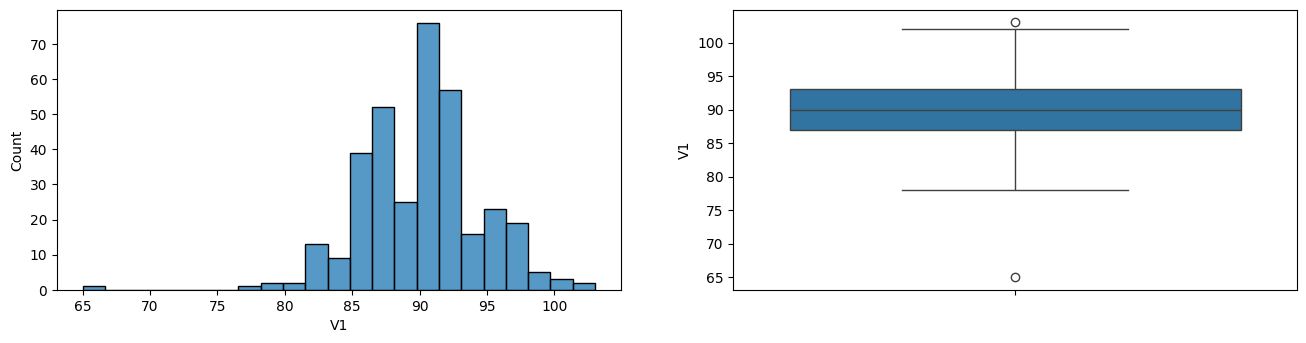

In [83]:
#Visualizamos la distribucion de los datos del dataset original data_X
plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.histplot(data_X['V1'])
plt.subplot(2,2,2)
sns.boxplot(data_X['V1'])

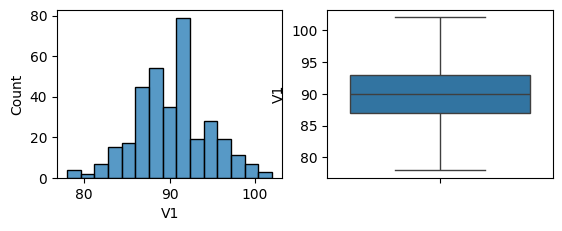

In [85]:
#Visualizamos la distribucion de los datos del dataset new_df_cap (copia del original en el cual actualizamos los outliers con los valores
# lower_limit y upper_limit
plt.subplot(2,2,3)
sns.histplot(new_df_cap['V1'])
plt.subplot(2,2,4)
sns.boxplot(new_df_cap['V1'])
plt.show()

In [72]:
#2.Tratamiento 2
#Las variables no se aproximan a una distribución normal

In [86]:
data_X = pd.DataFrame(data.drop('V7', axis=1))
data_X.head()

,V1,V2,V3,V4,V5,V6
0,85,92,45,27,31,0.0
1,85,64,59,32,23,0.0
2,86,54,33,16,54,0.0
3,91,78,34,24,36,0.0
4,87,70,12,28,10,0.0


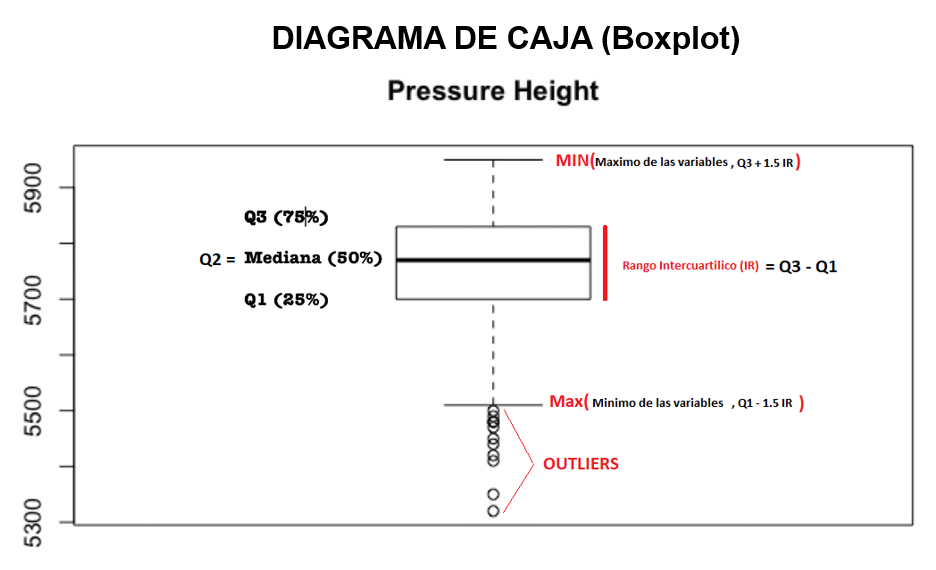

In [74]:
#Encontrando RIC (rango intercuartilico)
percentile25 = data_X['V1'].quantile(0.25)
percentile75 = data_X['V1'].quantile(0.75)
ric = percentile75 - percentile25 #Equivale a Q3-Q1

In [75]:
#Limitación de valores atípicos
upper_limit = percentile75 + 1.5 * ric # Equivale a Q3 + 1.5(ric)
lower_limit = percentile25 - 1.5 * ric # Equivale a Q1 - 1.5(ric)

In [76]:
#Encontrando los valores atípicos
data_X[(data_X['V1'] > upper_limit) | (data_X['V1'] < lower_limit)]

,V1,V2,V3,V4,V5,V6
68,103,75,19,30,13,1.0
223,65,63,19,20,14,0.5


In [77]:
#Aplicación de los límites: asignamos el upper_limit y lower_limit al dataset original data_X, ahora copiado en new_df
new_df = data_X[data_X['V1'] < upper_limit]
new_df.shape

(343, 6)

In [78]:
#Aplicación de los límites: asignamos el upper_limit y lower_limit al dataset original data_X, ahora copiado en new_df_cap
new_df_cap = data_X.copy()
new_df_cap['V1'] = np.where(
    new_df_cap['V1'] > upper_limit,
    upper_limit,
    np.where(
        new_df_cap['V1'] < lower_limit,
        lower_limit,
        new_df_cap['V1']
    )
)

In [79]:
#Encontrando los valores atípicos, ya no los tiene la copia del dataset original
new_df_cap[(new_df_cap['V1'] > upper_limit) | (new_df_cap['V1'] < lower_limit)]

,V1,V2,V3,V4,V5,V6


In [80]:
#Mantenemos la misma cantidad de observaciones pero reemplazamos los valores atipicos en el datase copia del original new_df_cap
new_df_cap.shape

(345, 6)

<Axes: ylabel='V1'>

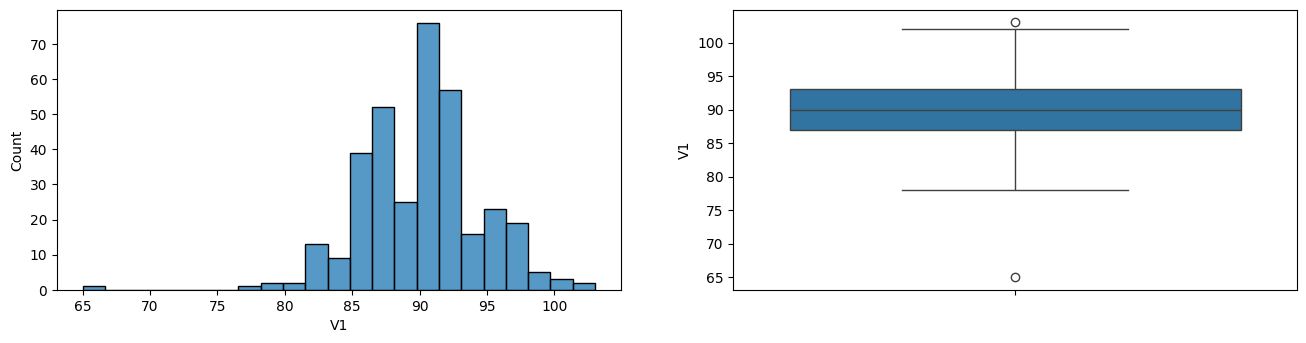

In [87]:
#Visualizamos la distribucion de los datos del dataset original data_X.  Observamos que no sigue una distribucion normal.
plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.histplot(data_X['V1'])
plt.subplot(2,2,2)
sns.boxplot(data_X['V1'])


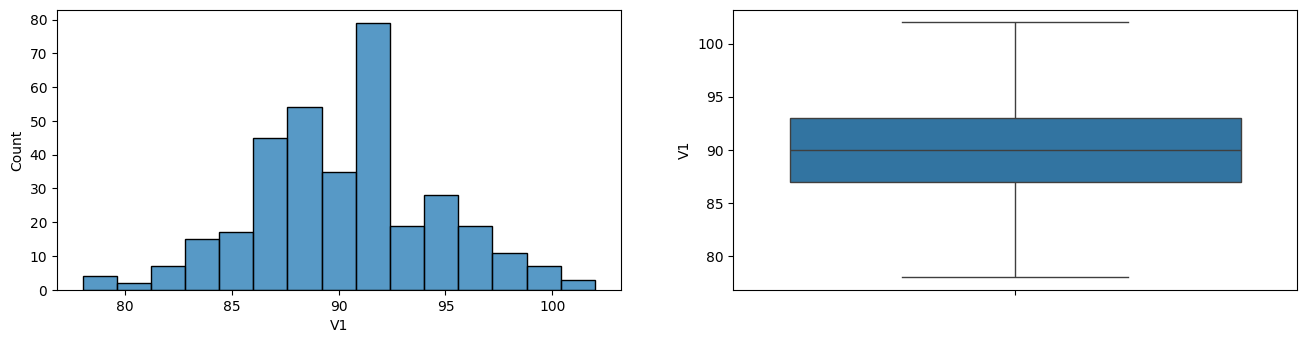

In [89]:
#Visualizamos la distribucion de los datos del dataset new_df_cap (copia del original en el cual actualizamos los outliers con los valores
# lower_limit y upper_limit).  Se observa una distribucion mas cerca a la normal.
plt.figure(figsize=(16,8))
plt.subplot(2,2,3)
sns.histplot(new_df_cap['V1'])
plt.subplot(2,2,4)
sns.boxplot(new_df_cap['V1'])
plt.show()